# Úkol č. 2 - Využití neuronových sítí

  * Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML2/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html).
  * Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>
  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    <br/><br/>
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

### Importování knihoven a nastavení random seedu.
* Seed nastavuju pro reprodukovatelnost některých algoritmů, které přímo nesouvisí s neuronovou sítí (Augmentace dat)



In [1]:
### odtud už je to Vaše
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import torch

seed = 69
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)



### Načtení dat
* dataset jsem si rozdělil na pro přesun na git.

In [2]:
df = pd.concat([pd.read_csv('train1.csv'), pd.read_csv('train2.csv')], axis=0)
df.reset_index(drop=True, inplace=True)

In [3]:
df

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
52496,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,6
52497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
52498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### Kontrola datasetu 
* Zastoupení všech 10 tříd se pohybuje kolem 10 %.
* Dataset je bez chybějících hodnot. Nemusím je doplňovat.
* Vysvětlovaná proměná je `label`

In [4]:
print("Počet NaN:", df.isna().sum().sum())
print("Počet tříd:", df.label.nunique())
print("Vyváženost tříd:", df.label.value_counts() / df.label.count() * 100)

Počet NaN: 0
Počet tříd: 10
Vyváženost tříd: label
9    10.140952
2    10.064762
0    10.059048
5    10.045714
4    10.019048
3     9.990476
6     9.969524
1     9.918095
7     9.900952
8     9.891429
Name: count, dtype: float64


## Dělení datasetu
* Dataset rozděluji na 3 podmnožiny (trénovací, validační a testovací) v poměru 60:20:20

In [5]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(df.drop(["label"], axis=1), df.label, shuffle=True, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, shuffle=True, random_state=42, test_size=0.25)

## Vizualizace dat
* Zobrazení prvních pěti obrázků z každé třídy

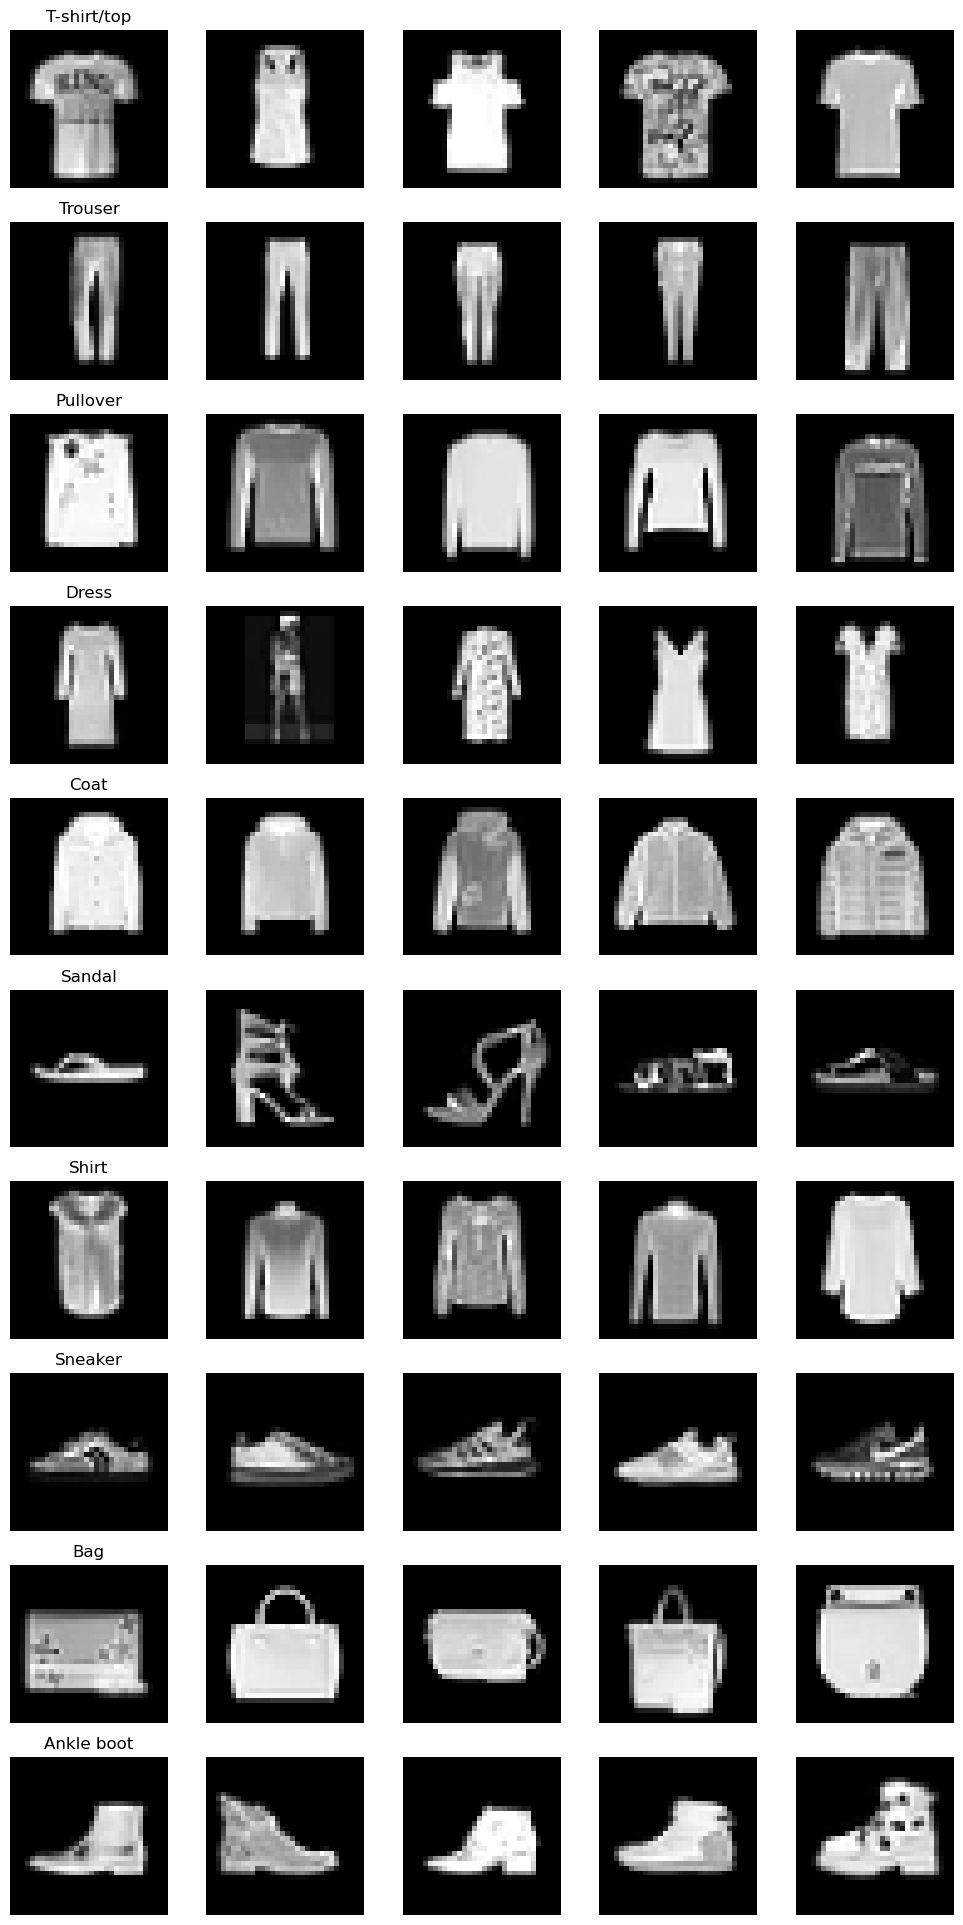

<Figure size 640x480 with 0 Axes>

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

def show_examples_per_class(X, y, image_size=(32, 32), class_names=None, n_images=5):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    plt.figure(figsize=(n_images * 2, n_classes * 2))

    for row, cls in enumerate(unique_classes):
        indices = np.where(y == cls)[0]
        selected_indices = indices[:n_images]
        for col, idx in enumerate(selected_indices):
            plt_idx = row * n_images + col + 1

            if isinstance(X, pd.DataFrame):
                image = X.iloc[idx].values.reshape(image_size)
            else:
                image = X[idx].reshape(image_size)

            ax = plt.subplot(n_classes, n_images, plt_idx)
            ax.imshow(image, cmap='gray')
            ax.axis('off')
            if col == 0:
                title = class_names[cls] if class_names is not None else f"Třída {cls}"
                ax.set_title(title, fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig("obrazek_s_titulky.png")
    plt.show()
    plt.draw()

show_examples_per_class(X_train, y_train, image_size=(32, 32), class_names=class_names, n_images=5)

## Augmentace dat
* Trénovací dataset rozšiřuji o kopie obrázků z trénovací množiny pomocí knihovny torchvision.
* Nově vzniklé obrázky mohou být horizontálně otočeny a natočeny až o 10 stupňů do strany.
* Velikost trénovací množiny jsem pomocí augementace zdvojnásobil. Testoval jsem i vícenásobné zvětšení trénovací množiny, ale tento postup nepřinesl příznivé výsledky.

In [6]:
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd

X_train_original = X_train.copy(deep=True)
y_train_original = y_train.copy(deep=True)

augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10)
])
n_augmented = 30_000 
indices = np.random.choice(len(X_train), size=n_augmented, replace=True)

augmented_images = []
augmented_labels = []

for idx in indices:
    img_arr = X_train.iloc[idx].values.reshape(32, 32).astype(np.uint8)
    img = Image.fromarray(img_arr, mode='L')
    img_aug = augment(img)
    img_aug_np = np.array(img_aug).reshape(1, -1)  # zpět do 1D

    augmented_images.append(img_aug_np)
    augmented_labels.append(y_train.iloc[idx])

X_augmented = pd.DataFrame(np.vstack(augmented_images), columns=X_train.columns)
y_augmented = pd.Series(augmented_labels)

X_train = pd.concat([X_train, X_augmented], axis=0).reset_index(drop=True)
y_train = pd.concat([y_train, y_augmented], axis=0).reset_index(drop=True)


## Standardizace dat
* Vytvářím jednu kopii datasetu, kterou standardizuji. Tato kopie je dále transformována pomocí PCA a následně použita pro dopřednou neuronovou síť.
* Původní dataset pouze dělím maximální hodnotou, kterou může pixel nabývat. Získám tak rozdělení hodnot pixelů [0, 255]. Tento dataset bude využit pro konvoluční neuronovou síť. Tuto úpravu datasetu jsem přesunul do části s konvoluční sítí.

In [19]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train_s_scaled = s_scaler.fit_transform(X_train)
X_val_s_scaled = s_scaler.transform(X_val)
X_test_s_scaled = s_scaler.transform(X_test)



## PCA
* Nejprve zjistím optimální počet komponent, které zachovávají 95% rozptylu.
* Poté vytvořím nové PCA, které přijímá počet komponent vypočtených z předchozího bodu. 

In [20]:
from sklearn.decomposition import PCA

pca_tester = PCA(n_components=0.95)
pca_tester.fit(X_train_mm_scaled)
cum_var = np.cumsum(pca_tester.explained_variance_ratio_)
n_components_tester = np.argmax(cum_var >= 0.95) + 1

In [21]:
pca = PCA(n_components=n_components_tester)

X_train_pca = pca.fit_transform(X_train_s_scaled)
X_val_pca = pca.transform(X_val_s_scaled)
X_test_pca = pca.transform(X_test_s_scaled)

# Dopředná neuronová síť
* Definice třídy je v souboru `NeuralNetwork.py`
## Vhodnost modelu
* +Rychlejší a jednodušší než CNN
* +Může pomoci využítí standardizace a PCA
* -Neuvažuje vztahy mezi sousedními pixely, což je u obrázkových dat důležité.
* -Model je citlivý na transformace dat.
* Model dosahuje slušných výsledků, ale v porvnání s modely, které se specializují na obrázková data, nedosahuje tak vysoké přesnosti.
*  

In [24]:
X_train_s_scaled.shape

(61500, 1024)

## První iterace
* V první iteraci testuji hyperparametry, které budou mít nejspíš největší vliv na velkou výkonost modelu. Jedná se o:
* * `hidden_layers` - počet neuronů v skrytých vrstvách
  * `dropout_frac` - pravděpodobnost, že v trénovací fázi bude neuron "vypnut"
  * `learnign_rate` - velikost kroku gradientního sestupu v trénovací fázi
  * `n_epochs` - počet epoch (v tomto případě neladím nechám působit early stopping)
  * `patience` - Argument early stoppingu, který definuje, kolik po sobě jdoucích epoch bez zlepšení výkonnosti modelu povede k předčasnému zastavení trénování.
  * `tol` - konstantní hodnota, která určuje o kolik se musí minimálně zlepšit accuracy aby nedošlo k early stoppingu
  * `optimizer` - algoritmus, který určuje, jakým způsobem jsou aktualizovány váhy při učení

In [58]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import torch.optim as optim

param_grid = ParameterGrid({
    "hidden_layers": [
        [1024, 512],
        [256, 128, 64],
        [1024, 512, 256]
    ],
    "learning_rate": [1e-1, 1e-2, 1e-3],
    "n_epochs": [1000],
    "patience": [20,50],
    "optimizer": [optim.AdamW, optim.RMSprop],
    "tol": [0.0],
    "dropout_frac": [0.0, 0.2, 0.5, 0.8],
})

In [ ]:
grid = list(param_grid)
df_l = pd.DataFrame(grid)

In [60]:
val_acc = []
for param in tqdm(param_grid, total=len(param_grid)):
    model = NeuralNetwork.NeuralNetwork(input_size=X_train_pca.shape[1], output_size=df.label.nunique(), device="cuda",**param)
    model.fit(pd.DataFrame(X_train_pca), pd.DataFrame(y_train), pd.DataFrame(X_val_pca), pd.DataFrame(y_val))
    res = model.predict(pd.DataFrame(X_val_pca))
    print(accuracy_score(y_val, res))
    val_acc.append(accuracy_score(y_val, res))

  1%|▎                                              | 1/144 [00:00<02:14,  1.07it/s]

Early stopping at epoch 9
0.2900952380952381


  1%|▋                                              | 2/144 [00:02<03:28,  1.47s/it]

Early stopping at epoch 6
0.10457142857142857


  2%|▉                                              | 3/144 [00:03<02:48,  1.20s/it]

Early stopping at epoch 4
0.10114285714285715


  3%|█▎                                             | 4/144 [00:05<03:28,  1.49s/it]

Early stopping at epoch 2
0.10371428571428572


  3%|█▋                                             | 5/144 [00:08<04:57,  2.14s/it]

Early stopping at epoch 62
0.4056190476190476


  4%|█▉                                             | 6/144 [00:13<06:48,  2.96s/it]

Early stopping at epoch 56
0.5988571428571429


  5%|██▎                                            | 7/144 [00:14<05:31,  2.42s/it]

Early stopping at epoch 8
0.16247619047619047


  6%|██▌                                            | 8/144 [00:17<05:31,  2.44s/it]

Early stopping at epoch 2
0.1301904761904762


  6%|██▉                                            | 9/144 [00:18<04:32,  2.02s/it]

Early stopping at epoch 1
0.09638095238095239


  6%|██▉                                            | 9/144 [00:18<04:42,  2.09s/it]


KeyboardInterrupt: 

## Výsledky první iterace
* bohužel se v dataframe rozbil `hidden_layers`.
* Z těchto výsledků se často opakují hodnoty v `dropout_frac`, `learning_rate` a `optimizer`
* 

In [44]:
import pandas as pd
grid = list(param_grid)
df = pd.DataFrame(grid)
df['accuracy'] = val_acc
top15 = df.sort_values(by='accuracy', ascending=False).head(15)
display(top15)

,dropout_frac,hidden_layers,learning_rate,n_epochs,optimizer,patience,tol,accuracy
17,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.815619
29,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.786571
5,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.750000
4,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,20,0.0,0.745524
28,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,20,0.0,0.627524
16,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.010,1000,<class 'torch.optim.adamw.AdamW'>,20,0.0,0.605429
9,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.001,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.538952
21,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.001,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.474857
33,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.001,1000,<class 'torch.optim.adamw.AdamW'>,50,0.0,0.333143
23,0.0,"[155, 155, 155, 155, 155, 155, 155, 155, 155, ...",0.001,1000,<class 'torch.optim.rmsprop.RMSprop'>,50,0.0,0.314476


* Dále jsem se rozhodl jednotlivé vrstvy zvětšit.
* Bohužel jsem si smazal předchozí testování a z časových důvodů je nestíhám doplnit.
* Rozhodl jsem se pouze pro regularizaci v podobě `dropout`, protože L2 regularizace v případě CNN nepřinesla výrazné zlepšení v poměru s trénovacím časem.

In [55]:
import NeuralNetwork
import torch
import importlib
importlib.reload(NeuralNetwork)  # znovu načíst modul
model = NeuralNetwork.NeuralNetwork(input_size=X_train_pca.shape[1], hidden_layers=[1024, 512, 256], output_size=df.label.nunique(), device="cuda", n_epochs=1000, learning_rate=0.001, patience=1000, tol=0.001)
model.fit(pd.DataFrame(X_train_pca), pd.DataFrame(y_train), pd.DataFrame(X_val_pca), pd.DataFrame(y_val))


In [56]:
from sklearn.metrics import accuracy_score
res = model.predict(pd.DataFrame(X_val_pca))
print(accuracy_score(y_val, res))


0.8656190476190476


## Finální model
* Accuracy score vyšlo 86,56%

# Konvoluční neuronová síť 
* Model je definován v souboru `ConvolutionalNeuralNetwork.py`
## Vhodnost modelu
* +Dokáže využít prostorovou strukturu vstupních dat. Proto se hodí na práci s obrázkovými daty.
* +Dobře pracuje s transformovanými daty. Nevadí jí posuny.
* -Složitější model na implementaci.
* -Náročnější na trénink (trvá déle).

## První iterace
* 

In [56]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.metrics import accuracy_score
param_grid = ParameterGrid({
    'learning_rate': [1e-4, 1e-2, 1e-3],
    'layer': [
        [32, 64],
        [64, 128],
        [32, 64, 128],
        [64, 128, 256]
    ],
    'dropout_frac': [0.0, 0.3, 0.5]
})
val_acc_cnn = []
for param in tqdm(param_grid, total=len(param_grid)):
    model_cnn = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train.shape[1], output_size=df.label.nunique(), n_epochs=400, patience=50, device="cuda", **param)
    model_cnn.fit(X_train, y_train, X_val, y_val)
    pred_df= torch.tensor(X_val.to_numpy(), dtype=torch.float32).to("cuda")
    pred_df= pred_df.view(-1, 1, 32, 32)
    
    print(accuracy_score(y_val, model_cnn.predict(pred_df)))
    val_acc_cnn.append(accuracy_score(y_val, model_cnn.predict(pred_df)))



  0%|                                                        | 0/36 [00:00<?, ?it/s]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8391
Epoch: 1| Validation accuracy score = 0.8630
Epoch: 2| Validation accuracy score = 0.8682
Epoch: 3| 

  3%|█▎                                           | 1/36 [07:14<4:13:44, 434.98s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8312
Epoch: 1| Validation accuracy score = 0.8590
Epoch: 2| Validation accuracy score = 0.8577
Epoch: 3| 

  6%|██▌                                          | 2/36 [11:35<3:08:12, 332.14s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8632
Epoch: 1| Validation accuracy score = 0.8746
Epoch: 2| Validation accuracy score = 0.8887
Epoch: 3| 

  8%|███▊                                         | 3/36 [19:37<3:40:23, 400.70s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8547
Epoch: 1| Validation accuracy score = 0.8793
Epoch: 2| Validation accuracy score = 0.8694
Epoch: 3

 11%|█████                                        | 4/36 [34:04<5:11:48, 584.64s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8130
Epoch: 1| Validation accuracy score = 0.8492
Epoch: 2| Validation accuracy score = 0.8446
Epoch: 3

 14%|██████▎                                      | 5/36 [38:39<4:04:25, 473.07s/it]

0.8904761904761904
32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.0, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8594
Epoch: 1| Validation accuracy score = 0.8800
Epoch: 2| Validation accuracy scor

 17%|███████▌                                     | 6/36 [45:39<3:47:34, 455.14s/it]

0.8998095238095238
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_featu

 19%|████████▊                                    | 7/36 [59:06<4:35:31, 570.06s/it]

0.8965714285714286
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_featu

 22%|█████████▌                                 | 8/36 [1:06:10<4:04:18, 523.51s/it]

0.8970476190476191
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_featu

 25%|██████████▊                                | 9/36 [1:12:13<3:33:04, 473.51s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 28%|███████████▋                              | 10/36 [1:20:10<3:25:36, 474.48s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 31%|████████████▊                             | 11/36 [1:31:27<3:43:34, 536.57s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.0, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.0, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.0, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 33%|██████████████                            | 12/36 [1:40:36<3:36:04, 540.20s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8099
Epoch: 1| Validation accuracy score = 0.8326
Epoch: 2| Validation accuracy score = 0.8466
Epoch: 3| 

 36%|███████████████▏                          | 13/36 [1:49:24<3:25:39, 536.50s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7633
Epoch: 1| Validation accuracy score = 0.8194
Epoch: 2| Validation accuracy score = 0.8389
Epoch: 3| 

 39%|████████████████▎                         | 14/36 [1:57:53<3:13:41, 528.24s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8332
Epoch: 1| Validation accuracy score = 0.8549
Epoch: 2| Validation accuracy score = 0.8711
Epoch: 3| 

 42%|█████████████████▌                        | 15/36 [2:04:59<2:54:08, 497.57s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8165
Epoch: 1| Validation accuracy score = 0.8487
Epoch: 2| Validation accuracy score = 0.8656
Epoch: 3

 44%|██████████████████▋                       | 16/36 [2:14:45<2:54:40, 524.01s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7228
Epoch: 1| Validation accuracy score = 0.7450
Epoch: 2| Validation accuracy score = 0.7711
Epoch: 3

 47%|███████████████████▊                      | 17/36 [2:34:00<3:46:04, 713.93s/it]

0.8971428571428571
32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8316
Epoch: 1| Validation accuracy score = 0.8597
Epoch: 2| Validation accuracy scor

 50%|█████████████████████                     | 18/36 [2:45:47<3:33:29, 711.67s/it]

0.9104761904761904
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_featu

 53%|██████████████████████▏                   | 19/36 [2:55:50<3:12:26, 679.23s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=2048, out_featu

 56%|███████████████████████▎                  | 20/36 [3:06:10<2:56:21, 661.35s/it]

0.8964761904761904
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_featu

 58%|████████████████████████▌                 | 21/36 [3:16:00<2:40:00, 640.01s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 61%|█████████████████████████▋                | 22/36 [3:28:30<2:37:01, 672.94s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 64%|██████████████████████████▊               | 23/36 [3:45:56<2:50:04, 784.97s/it]

0.9031428571428571
32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.3, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.3, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.3, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_fe

 67%|████████████████████████████              | 24/36 [3:54:11<2:19:32, 697.71s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7747
Epoch: 1| Validation accuracy score = 0.8043
Epoch: 2| Validation accuracy score = 0.8202
Epoch: 3| 

 69%|█████████████████████████████▏            | 25/36 [4:07:29<2:13:26, 727.90s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7001
Epoch: 1| Validation accuracy score = 0.7599
Epoch: 2| Validation accuracy score = 0.7914
Epoch: 3| 

 72%|██████████████████████████████▎           | 26/36 [4:18:56<1:59:15, 715.58s/it]

32.0
16.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=4096, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.8085
Epoch: 1| Validation accuracy score = 0.8292
Epoch: 2| Validation accuracy score = 0.8422
Epoch: 3| 

 75%|███████████████████████████████▌          | 27/36 [4:40:03<2:12:10, 881.17s/it]

0.9102857142857143
32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7764
Epoch: 1| Validation accuracy score = 0.8162
Epoch: 2| Validation accuracy scor

 78%|████████████████████████████████▋         | 28/36 [4:57:17<2:03:35, 926.97s/it]

0.9101904761904762
32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7239
Epoch: 1| Validation accuracy score = 0.7737
Epoch: 2| Validation accuracy scor

 81%|█████████████████████████████████▊        | 29/36 [5:14:46<1:52:25, 963.62s/it]

0.8819047619047619
32.0
16.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=8192, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7907
Epoch: 1| Validation accuracy score = 0.8233
Epoch: 2| Validation accuracy scor

 83%|███████████████████████████████████       | 30/36 [5:32:44<1:39:47, 997.95s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=2048, out_featu

 86%|███████████████████████████████████▎     | 31/36 [5:56:38<1:34:03, 1128.71s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=2048, out_featu

 89%|████████████████████████████████████▍    | 32/36 [6:12:08<1:11:16, 1069.10s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=2048, out_featu

 92%|███████████████████████████████████████▍   | 33/36 [6:35:19<58:16, 1165.57s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 94%|████████████████████████████████████████▌  | 34/36 [6:59:54<41:57, 1258.52s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

 97%|█████████████████████████████████████████▊ | 35/36 [7:21:31<21:09, 1269.90s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

100%|████████████████████████████████████████████| 36/36 [7:41:22<00:00, 768.95s/it]

0.9172380952380952


## Výsledek první iterace
* Ukazuje se, že model chce širší a větší vrstvy.
* Vyšší dropout dodává lepší výsledky
* Všechny výsledky dosahují aspoň 85% accuracy. Dopředná neuronová síť dosahovala i přesnosti 10%, což znamená náhodné tipování.

In [65]:
res_df = pd.DataFrame(param_grid)
res_df["acc"] = val_acc_cnn
res_df.sort_values(by="acc", ascending=False)


,dropout_frac,layer,learning_rate,acc
33,0.5,"[64, 128, 256]",0.0001,0.918000
21,0.3,"[64, 128, 256]",0.0001,0.917619
35,0.5,"[64, 128, 256]",0.0010,0.917238
23,0.3,"[64, 128, 256]",0.0010,0.916952
18,0.3,"[32, 64, 128]",0.0001,0.914571
30,0.5,"[32, 64, 128]",0.0001,0.913619
20,0.3,"[32, 64, 128]",0.0010,0.912762
29,0.5,"[64, 128]",0.0010,0.912762
32,0.5,"[32, 64, 128]",0.0010,0.912190
17,0.3,"[64, 128]",0.0010,0.910476


## Druhá iterace 
* Zkouška zvýšení počtu epoch a tolerance na nejlepším modelu z předochozí iterace. Výsledek se lehce zlepšil

In [20]:
import ConvolutionalNeuralNetwork
import importlib
importlib.reload(ConvolutionalNeuralNetwork)  # znovu načíst modul

model_cnn = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(layer= [64, 128, 256],input_size=X_train.shape[1], output_size=df.label.nunique(), n_epochs=600, learning_rate=0.001, patience=200, device="cuda")


32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.5, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.5, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_fe

In [24]:
model_cnn.fit(X_train, y_train, X_val, y_val)

torch.Size([10500, 1024])
Epoch: 0| Validation accuracy score = 0.7884
Epoch: 1| Validation accuracy score = 0.8172
Epoch: 2| Validation accuracy score = 0.8290
Epoch: 3| Validation accuracy score = 0.8434
Epoch: 4| Validation accuracy score = 0.8494
Epoch: 5| Validation accuracy score = 0.8518
Epoch: 6| Validation accuracy score = 0.8567
Epoch: 7| Validation accuracy score = 0.8682
Epoch: 8| Validation accuracy score = 0.8710
Epoch: 9| Validation accuracy score = 0.8737
Epoch: 10| Validation accuracy score = 0.8758
Epoch: 11| Validation accuracy score = 0.8815
Epoch: 12| Validation accuracy score = 0.8858
Epoch: 13| Validation accuracy score = 0.8852
Epoch: 14| Validation accuracy score = 0.8906
Epoch: 15| Validation accuracy score = 0.8918
Epoch: 16| Validation accuracy score = 0.8885
Epoch: 17| Validation accuracy score = 0.8919
Epoch: 18| Validation accuracy score = 0.8946
Epoch: 19| Validation accuracy score = 0.8910
Epoch: 20| Validation accuracy score = 0.8978
Epoch: 21| Validat

In [30]:
from sklearn.metrics import accuracy_score
pred_df= torch.tensor(X_val.to_numpy(), dtype=torch.float32).to("cuda")
pred_df= pred_df.view(-1, 1, 32, 32)
print(accuracy_score(model_cnn.predict(pred_df), y_val))

0.919047619047619


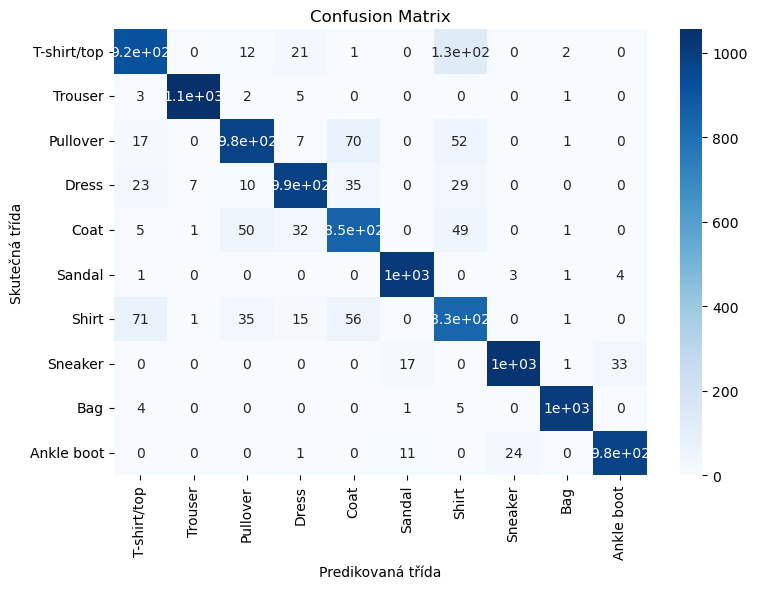

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(model_cnn.predict(pred_df), y_val)
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Skutečná třída')
plt.xlabel('Predikovaná třída')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Výsledek druhé iterace
* výsledná accuracy na validační množině je 91,90%
* V confusion matrix jsem se snažil odhalit, které třídy model špatně predikuje.
# Třetí iterace
* Zkouška zvýšení droupout a velikosti vrstev

In [27]:
param_grid2 = ParameterGrid({
    'learning_rate': [1e-4],
    'layer': [
        [256, 512, 1028]
    ],
    'dropout_frac': [0.6]
})
val_acc_cnn2 = []
for param in tqdm(param_grid2, total=len(param_grid2)):
    model_cnn = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train.shape[1], output_size=df.label.nunique(), n_epochs=1500, patience=150, device="cuda", **param)
    model_cnn.fit(X_train, y_train, X_val, y_val)
    pred_df= torch.tensor(X_val.to_numpy(), dtype=torch.float32).to("cuda")
    pred_df= pred_df.view(-1, 1, 32, 32)
    
    print(accuracy_score(y_val, model_cnn.predict(pred_df)))
    val_acc_cnn2.append(accuracy_score(y_val, model_cnn.predict(pred_df)))

  0%|                                                         | 0/1 [00:00<?, ?it/s]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(512, 1028, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(1028, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16448, 

100%|█████████████████████████████████████████████| 1/1 [1:25:10<00:00, 5110.62s/it]


## Výsledek třetí iterace
* úprava hyperparametrů vedla k zlepšení 
## Čtvrtá iterace
* snížení velikosti vrstev

In [28]:
param_grid2 = ParameterGrid({
    'learning_rate': [1e-4],
    'layer': [
        [128, 256, 512]
    ],
    'dropout_frac': [0.6]
})
val_acc_cnn2 = []
for param in tqdm(param_grid2, total=len(param_grid2)):
    model_cnn = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train.shape[1], output_size=df.label.nunique(), n_epochs=1500, patience=150, device="cuda", **param)
    model_cnn.fit(X_train, y_train, X_val, y_val)
    pred_df= torch.tensor(X_val.to_numpy(), dtype=torch.float32).to("cuda")
    pred_df= pred_df.view(-1, 1, 32, 32)
    
    print(accuracy_score(y_val, model_cnn.predict(pred_df)))
    val_acc_cnn2.append(accuracy_score(y_val, model_cnn.predict(pred_df)))


  0%|                                                         | 0/1 [00:00<?, ?it/s]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

100%|█████████████████████████████████████████████| 1/1 [1:25:08<00:00, 5108.93s/it]


In [34]:
pred_df= torch.tensor(X_val.to_numpy(), dtype=torch.float32).to("cuda")
pred_df= pred_df.view(-1, 1, 32, 32)    
print(accuracy_score(y_val, model_cnn.predict(pred_df)))

0.9220952380952381


## Výsledek čtvrté iterace
* Zde jsem zjistil, že velikost vrstev [128, 256, 512] bude pro model nejvýhodnější.
* Dosáhl jsem zatím nejvyšší přesnosti 92.2%
## Pátá iterace
* Zde jsem ladil L2 regularizaci, jiné optimizery a aktivační funkce. 
* Trénování jsem ukončil dříve z časových důvodů.
* Další důvod dřívějšího ukončení byl, že aktivační funkce neměla výrazný vliv na model.

In [24]:
import torch.optim as optim
from torch import nn
param_grid_last = ParameterGrid({
    "weight_decay": [1e-4, 0],
    "optimizer": [optim.AdamW, optim.RMSprop],
    "activation_func": [nn.SELU(),nn.Tanh(),  nn.GELU(), nn.ReLU(), nn.LeakyReLU()],
    
})
val_acc_cnn2 = []
for param in tqdm(param_grid_last, total=len(param_grid_last)):
    model_cnn_pg = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train.shape[1], learning_rate = 1e-4,layer = [128, 256, 512],
    dropout_frac = 0.6, output_size=df.label.nunique(), n_epochs=1500, patience=150, device="cuda", **param)    
    model_cnn_pg.fit(X_train, y_train, X_val, y_val)
    print(accuracy_score(y_val, model_cnn_pg.predict(X_val)))
    val_acc_cnn2.append(accuracy_score(y_val, model_cnn_pg.predict(X_val)))

  0%|                                                        | 0/20 [00:00<?, ?it/s]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SELU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): SELU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): SELU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

  5%|██                                       | 1/20 [1:07:40<21:25:53, 4060.72s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SELU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): SELU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): SELU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

 10%|████                                     | 2/20 [2:15:49<20:23:05, 4076.95s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SELU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): SELU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): SELU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

 15%|██████▏                                  | 3/20 [3:32:25<20:22:23, 4314.32s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SELU()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): SELU()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): SELU()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

 20%|████████▏                                | 4/20 [6:00:12<27:09:47, 6111.70s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Tanh()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Tanh()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

 25%|██████████▎                              | 5/20 [7:24:40<23:53:47, 5735.19s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Tanh()
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Tanh()
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=8192, out

 25%|██████████▎                              | 5/20 [8:21:44<25:05:13, 6020.90s/it]


KeyboardInterrupt: 

## Výsledek páté iterace
* výsledky byly velice podobné, i přes změnu hyperparametrů.
## Úprava dat
* Zkusil jsem upravit data, tak aby byly pouze v rozsahu [0, 1]

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

## Šestá iterace
* ZKouším L2 regularizaci + optimizer + jinou aktivační funkci

In [28]:
import torch.optim as optim
from torch import nn
from sklearn.metrics import accuracy_score
param_grid_last = ParameterGrid({
    "weight_decay": [1e-4, 0],
    "optimizer": [optim.AdamW, optim.RMSprop],
    "activation_func": [nn.LeakyReLU()],
    
})
val_acc_cnn3 = []
for param in tqdm(param_grid_last, total=len(param_grid_last)):
    model_cnn_pg = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train.shape[1], learning_rate = 1e-4,layer = [128, 256, 512],
    dropout_frac = 0.6, output_size=df.label.nunique(), n_epochs=1500, patience=150, device="cuda", **param)    
    model_cnn_pg.fit(X_train, y_train, X_val, y_val)
    print(accuracy_score(y_val, model_cnn_pg.predict(X_val)))
    val_acc_cnn3.append(accuracy_score(y_val, model_cnn_pg.predict(X_val)))

  0%|                                                         | 0/4 [00:00<?, ?it/s]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

 25%|██████████▊                                | 1/4 [1:14:25<3:43:15, 4465.06s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

 50%|█████████████████████▌                     | 2/4 [2:28:23<2:28:19, 4449.57s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

 75%|████████████████████████████████▎          | 3/4 [3:32:08<1:09:24, 4164.21s/it]

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

100%|█████████████████████████████████████████████| 4/4 [4:14:20<00:00, 3815.24s/it]


In [37]:
last_df = pd.DataFrame(param_grid_last)
last_df["acc"] = val_acc_cnn3
last_df

,activation_func,optimizer,weight_decay,acc
0,LeakyReLU(negative_slope=0.01),<class 'torch.optim.adamw.AdamW'>,0.0001,0.921810
1,LeakyReLU(negative_slope=0.01),<class 'torch.optim.adamw.AdamW'>,0.0000,0.921810
2,LeakyReLU(negative_slope=0.01),<class 'torch.optim.rmsprop.RMSprop'>,0.0001,0.920857
3,LeakyReLU(negative_slope=0.01),<class 'torch.optim.rmsprop.RMSprop'>,0.0000,0.917048


## Výsledek šesté iterace
* Dosáhl jsem zatím nejlepší výsledků.
* Opět se ukazuje, že optimizer AdamW funguje l=pe než RMSprop.
# Dodatečná augmentace dat
* Rozhodl jsem se, že zkusím rozšířit třídy, které model špatně klasifikuji.
* Ve slovníku `class_to_augment` jsem zvolil počet nových datových bodů podle přesnosti na validační množině.
* Takto jsem vytvořil nový dataset

In [38]:
class_to_augment = {
    6: 3500,
    4: 2500,
    2: 2500, 
    9: 600, 
    0: 100,   
    1: 100, 
    3: 100,   
    5: 100,  
    7: 300,   
    8: 100,
}


augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10)
])
X_train_double_augmented = X_train.copy(deep=True)
y_train_double_augmented = y_train.copy(deep=True)
for cls in class_to_augment:
    
    n_augmented = class_to_augment[cls]
    indices_curr_class = np.where(y_train_original == cls)[0]
    indices = np.random.choice(indices_curr_class, size=n_augmented, replace=True)
    augmented_images = []
    augmented_labels = []
    
    for idx in indices:
        img_arr = X_train_original.iloc[idx].values.reshape(32, 32).astype(np.uint8)
        img = Image.fromarray(img_arr, mode='L')
        img_aug = augment(img)
        img_aug_np = np.array(img_aug).reshape(1, -1)  # zpět do 1D
    
        augmented_images.append(img_aug_np)
        augmented_labels.append(y_train.iloc[idx])
    X_augmented = pd.DataFrame(np.vstack(augmented_images), columns=X_train.columns)
    y_augmented = pd.Series(augmented_labels)
    X_train_double_augmented = pd.concat([X_train_double_augmented, X_augmented], axis=0).reset_index(drop=True)
    y_train_double_augmented = pd.concat([y_train_double_augmented, y_augmented], axis=0).reset_index(drop=True)

In [80]:
X_train_double_augmented = X_train_double_augmented / 255
X_train_double_augmented["pix500"]

0        0.654902
1        0.827451
2        0.388235
3        0.541176
4        0.921569
           ...   
71395    0.839216
71396    0.921569
71397    0.639216
71398    0.654902
71399    0.015686
Name: pix500, Length: 71400, dtype: float64

## Sedmá iterace 
* Testuji nejlepší paramatery s nově augmentovanými daty.
* Rozšířil jsem patience a počet epoch

In [47]:
import ConvolutionalNeuralNetwork
import importlib
importlib.reload(ConvolutionalNeuralNetwork) 
model_cnn = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train_double_augmented.shape[1], learning_rate = 1e-4,layer = [128, 256, 512],
    dropout_frac = 0.6, output_size=df.label.nunique(), n_epochs=1500, patience=200, device="cuda", weight_decay = 1e-4, optimizer=optim.AdamW,activation_func=nn.LeakyReLU())
model_cnn.fit(X_train_double_augmented, y_train_double_augmented, X_val_2, y_val)

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

In [50]:
res = model_cnn.predict(X_val_2)

In [51]:
print(accuracy_score(res, y_val))

0.9245714285714286


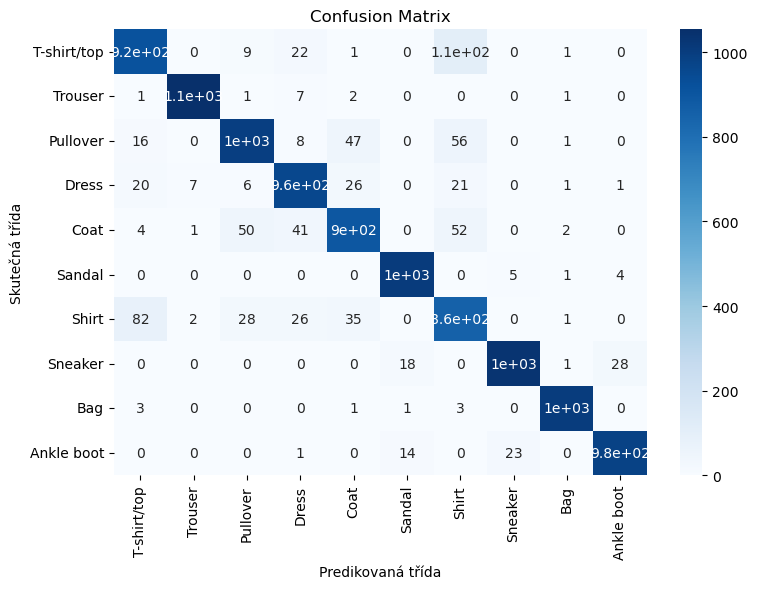

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(res, y_val)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Skutečná třída')
plt.xlabel('Predikovaná třída')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [68]:
recall_per_class = np.diag(conf_mat) / conf_mat.sum(axis=1)
for i in range(len(recall_per_class)):
    print(f"{class_names[i],i}: {(recall_per_class[i]*100):.2f}%")

('T-shirt/top', 0): 86.52%
('Trouser', 1): 98.87%
('Pullover', 2): 88.60%
('Dress', 3): 92.15%
('Coat', 4): 85.66%
('Sandal', 5): 99.02%
('Shirt', 6): 83.11%
('Sneaker', 7): 95.65%
('Bag', 8): 99.21%
('Ankle boot', 9): 96.27%


## Výsledek sedmé iterace
* augmentace dat pomohla dále zlepšit výsledky. Accuracy se nyní na validační množině pohybuje kolem 92.46%
* Zobrazil jsem si také jaké třídy je potřeba dále rozšířit.
## Osmá iterace 
* Z předchozí iterace jsem se rozhodl vytvořit další augmentaci převážně prvků tříd, které byly špatně klasifikovány.


In [81]:
class_to_augment = {
    6: 2800,
    4: 2200,
    2: 2000, 
    9: 600, 
    0: 2100,   
    1: 100, 
    3: 800,   
    5: 100,  
    7: 300,   
    8: 100,
}

augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10)
])
X_train_triple_augmented = X_train_double_augmented.copy(deep=True)
y_train_triple_augmented = y_train_double_augmented.copy(deep=True)
for cls in class_to_augment:
    
    n_augmented = class_to_augment[cls]
    indices_curr_class = np.where(y_train_original == cls)[0]
    indices = np.random.choice(indices_curr_class, size=n_augmented, replace=True)
    augmented_images = []
    augmented_labels = []
    
    for idx in indices:
        img_arr = X_train_original.iloc[idx].values.reshape(32, 32).astype(np.uint8)
        img = Image.fromarray(img_arr, mode='L')
        img_aug = augment(img)
        img_aug_np = np.array(img_aug).reshape(1, -1)  # zpět do 1D
    
        augmented_images.append(img_aug_np)
        augmented_labels.append(y_train.iloc[idx])
    X_augmented = pd.DataFrame(np.vstack(augmented_images), columns=X_train.columns)/255
    y_augmented = pd.Series(augmented_labels)
    X_train_triple_augmented = pd.concat([X_train_triple_augmented, X_augmented], axis=0).reset_index(drop=True)
    y_train_triple_augmented = pd.concat([y_train_triple_augmented, y_augmented], axis=0).reset_index(drop=True)

In [84]:
import ConvolutionalNeuralNetwork
import importlib
importlib.reload(ConvolutionalNeuralNetwork) 
model_cnn_triple = ConvolutionalNeuralNetwork.ConvolutionalNeuralNetwork(input_size=X_train_triple_augmented.shape[1], learning_rate = 1e-4,layer = [128, 256, 512],
    dropout_frac = 0.6, output_size=df.label.nunique(), n_epochs=1500, patience=250, device="cuda", weight_decay = 1e-4, optimizer=optim.AdamW,activation_func=nn.LeakyReLU())
model_cnn_triple.fit(X_train_triple_augmented, y_train_triple_augmented, X_val_2, y_val)

32.0
16.0
8.0
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Dropout2d(p=0.6, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout2d(p=0.6, inplace=False)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): LeakyReLU(negative_slope=0.01)
  (13): Dropout2d(p=0.6, inplace=False)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15

## Výsledek osmé itarace
* Došlo opět k mírnému zlepšení. Další augmentace by mohla přinést ještě lepší výsledky, ale nemyslím si, že by byly nějak výrazné.
* Accuracy na validační sadě je 92.49%.

# Testovací sada
* Jako můj model jsem si zvolil konvoluční neuronovou síť s trojitou augmentací.
* Nyní jdu změřit, jak se bude model chovat na nezávislých datech, která ještě nikdy neviděl, protože jsem je oddělil na počátku.
* Vyšší přesnost si vysvětluji rozdílným zastoupením tříd v testovací množině oproti validační množině.
* Přesnost 92.82% mohu očekávat na neznámých datech, protože se jedná o nezávislá data na trénovací množině.
* I přes různé augmentace zůstává nejvíce problematická třída shirt.

In [86]:
X_test = X_test /255

In [89]:
res_test = model_cnn_triple.predict(X_test)
print("Accuracy score:", accuracy_score(res_test, y_test)*100)

Accuracy score: 92.82857142857142


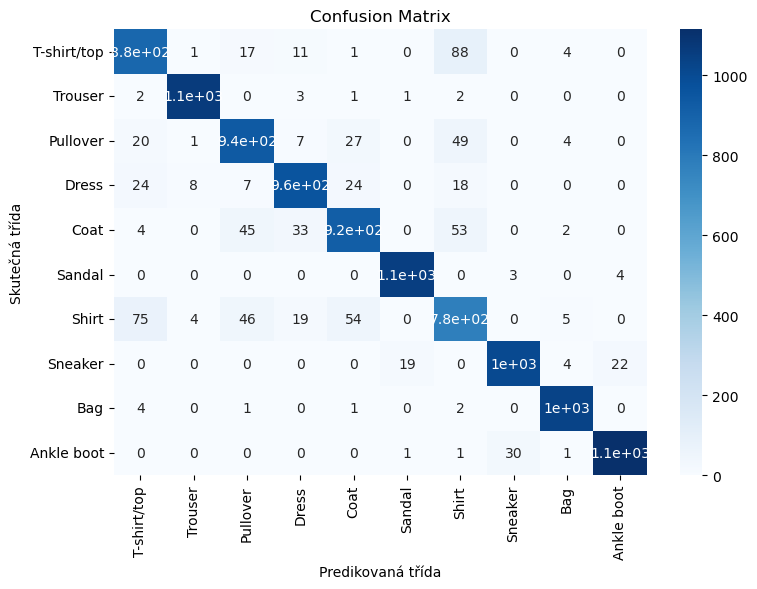

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(res_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Skutečná třída')
plt.xlabel('Predikovaná třída')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Evaluace

In [90]:
df_eval = pd.read_csv("evaluate.csv")
df_eval

,ID,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,17495,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
17496,17496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17497,17497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17498,17498,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [91]:
df_eval = df / 255

In [102]:
pred_eval = model_cnn_triple.predict(X_test)
pred_eval

array([5, 8, 8, ..., 2, 7, 2])

In [103]:
results = pd.DataFrame({
    'index': range(len(pred_eval)), 
    'label': pred_eval
})

In [104]:
results.set_index('index', inplace=True)

In [106]:
results.to_csv("results.csv")